In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression,Lasso,Ridge,ElasticNet,LogisticRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor,GradientBoostingRegressor,VotingRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import LabelEncoder,OneHotEncoder,StandardScaler,MinMaxScaler,RobustScaler
from sklearn.model_selection import train_test_split
import warnings # this library used to avoid the warnings..
warnings.filterwarnings("ignore")


In [2]:
data = pd.read_csv("house_prices - Copy.csv")
df = pd.DataFrame(data)
df.head(3)

,Index,Title,Description,Amount(in rupees),Price (in rupees),location,Carpet Area,Status,Floor,Transaction,...,facing,overlooking,Society,Bathroom,Balcony,Car Parking,Ownership,Super Area,Dimensions,Plot Area
0,0,1 BHK Ready to Occupy Flat for sale in Srushti...,"Bhiwandi, Thane has an attractive 1 BHK Flat f...",42 Lac,6000.0,thane,500 sqft,Ready to Move,10 out of 11,Resale,...,NaN,NaN,Srushti Siddhi Mangal Murti Complex,1,2,NaN,NaN,NaN,NaN,NaN
1,1,2 BHK Ready to Occupy Flat for sale in Dosti V...,One can find this stunning 2 BHK flat for sale...,98 Lac,13799.0,thane,473 sqft,Ready to Move,3 out of 22,Resale,...,East,Garden/Park,Dosti Vihar,2,NaN,1 Open,Freehold,NaN,NaN,NaN
2,2,2 BHK Ready to Occupy Flat for sale in Sunrise...,Up for immediate sale is a 2 BHK apartment in ...,1.40 Cr,17500.0,thane,779 sqft,Ready to Move,10 out of 29,Resale,...,East,Garden/Park,Sunrise by Kalpataru,2,NaN,1 Covered,Freehold,NaN,NaN,NaN


In [3]:
df.count()

Index                187531
Title                187531
Description          184508
Amount(in rupees)    187531
Price (in rupees)    169866
location             187531
Carpet Area          106858
Status               186916
Floor                180454
Transaction          187448
Furnishing           184634
facing               117298
overlooking          106095
Society               77853
Bathroom             186703
Balcony              138596
Car Parking           84174
Ownership            122014
Super Area            79846
Dimensions                0
Plot Area                 0
dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187531 entries, 0 to 187530
Data columns (total 21 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Index              187531 non-null  int64  
 1   Title              187531 non-null  object 
 2   Description        184508 non-null  object 
 3   Amount(in rupees)  187531 non-null  object 
 4   Price (in rupees)  169866 non-null  float64
 5   location           187531 non-null  object 
 6   Carpet Area        106858 non-null  object 
 7   Status             186916 non-null  object 
 8   Floor              180454 non-null  object 
 9   Transaction        187448 non-null  object 
 10  Furnishing         184634 non-null  object 
 11  facing             117298 non-null  object 
 12  overlooking        106095 non-null  object 
 13  Society            77853 non-null   object 
 14  Bathroom           186703 non-null  object 
 15  Balcony            138596 non-null  object 
 16  Ca

In [5]:
df.shape

(187531, 21)

In [6]:
for idx,columns in enumerate(df.columns):
    print(f"{idx+1}: {columns}")

1: Index
2: Title
3: Description
4: Amount(in rupees)
5: Price (in rupees)
6: location
7: Carpet Area
8: Status
9: Floor
10: Transaction
11: Furnishing
12: facing
13: overlooking
14: Society
15: Bathroom
16: Balcony
17: Car Parking
18: Ownership
19: Super Area
20: Dimensions
21: Plot Area


In [7]:
df.nunique().sort_values()

Plot Area                 0
Dimensions                0
Status                    1
Furnishing                3
Transaction               4
Ownership                 4
facing                    8
Bathroom                 11
Balcony                  11
overlooking              19
location                 81
Car Parking             229
Floor                   947
Amount(in rupees)      1561
Carpet Area            2758
Super Area             2976
Society               10376
Price (in rupees)     10958
Title                 32446
Description           65634
Index                187531
dtype: int64

In [8]:
df.drop(columns=['Dimensions', 'Plot Area', 'Index',"Floor",'Title', 
                 'Description','Status','Society',"overlooking","Car Parking"], inplace=True, errors='ignore')

In [9]:
split_data = []
for amount in df["Carpet Area"].astype(str):  
    try:        
        numeric, unit = amount.split()        
        split_data.append([float(numeric), unit])  
    except (ValueError, AttributeError): 
        split_data.append([None, None])
df[['Carpet Area', 'Carpet Area Unit']] = pd.DataFrame(split_data, columns=["Carpet Area", "Carpet Area Unit"])

In [10]:
df[["Carpet Area Unit"]].value_counts()

Carpet Area Unit
sqft                100428
sqyrd                 5526
sqm                    894
marla                    3
acre                     2
kanal                    2
bigha                    1
cent                     1
ground                   1
dtype: int64

In [11]:
df["Carpet Area Unit"].dtypes

dtype('O')

In [12]:
split_data = []
for amount in df["Super Area"].astype(str):  
    try:        
        numeric, unit = amount.split()        
        split_data.append([float(numeric), unit])  
    except (ValueError, AttributeError): 
        split_data.append([None, None])
df[['Super Area', 'Super Area Unit']] = pd.DataFrame(split_data, columns=["Super Area", "Super Area Unit"])

In [13]:
df[["Super Area Unit"]].value_counts()

Super Area Unit
sqft               75353
sqyrd               3547
sqm                  873
marla                  8
kanal                  4
ground                 2
aankadam               1
acre                   1
biswa2                 1
cent                   1
hectare                1
dtype: int64

In [14]:
split_data = []
for amount in df["Amount(in rupees)"]:
    try:
        numeric, unit = amount.split()
        split_data.append([float(numeric), unit])
    except ValueError:        
        split_data.append([None, None])
df[['Amount', 'Amount Unit']] = pd.DataFrame(split_data, columns=["Amount", "Amount Unit"])
df.drop(["Amount(in rupees)"],inplace=True,axis=1)

In [15]:
df["Amount Unit"] = df["Amount Unit"].replace({"Lac": 100000, "Cr": 10000000})

In [16]:
df["Total price"]= df["Amount"] * df["Amount Unit"]
df.drop(["Amount","Amount Unit"],inplace=True,axis=1)

## Exploratory Data Analysis

In [17]:
df.columns

Index(['Price (in rupees)', 'location', 'Carpet Area', 'Transaction',
       'Furnishing', 'facing', 'Bathroom', 'Balcony', 'Ownership',
       'Super Area', 'Carpet Area Unit', 'Super Area Unit', 'Total price'],
      dtype='object')

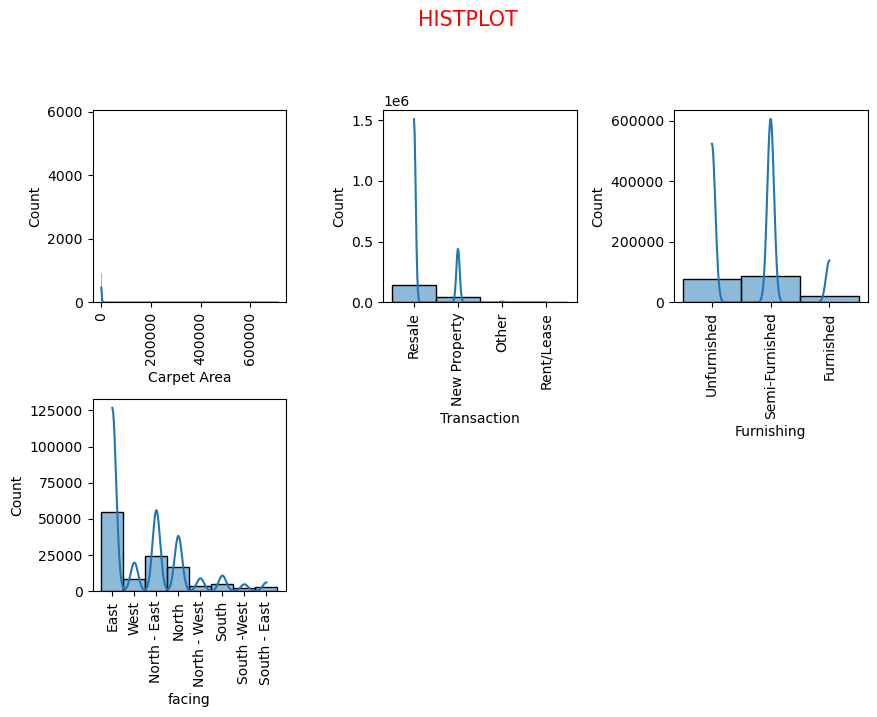

In [18]:
a=df.iloc[:,2:6]
plt.figure(figsize=(10,10))
no=1
for i in a:
    if no<=9:
        plt.suptitle("HISTPLOT",fontsize=15,color="red")
        plt.subplot(3,3,no)
        sns.histplot(x=a[i],kde=True)
        plt.xlabel(i)
        plt.xticks(rotation=90)
    no+=1
plt.subplots_adjust(hspace=0.5, wspace=0.5)
plt.show()

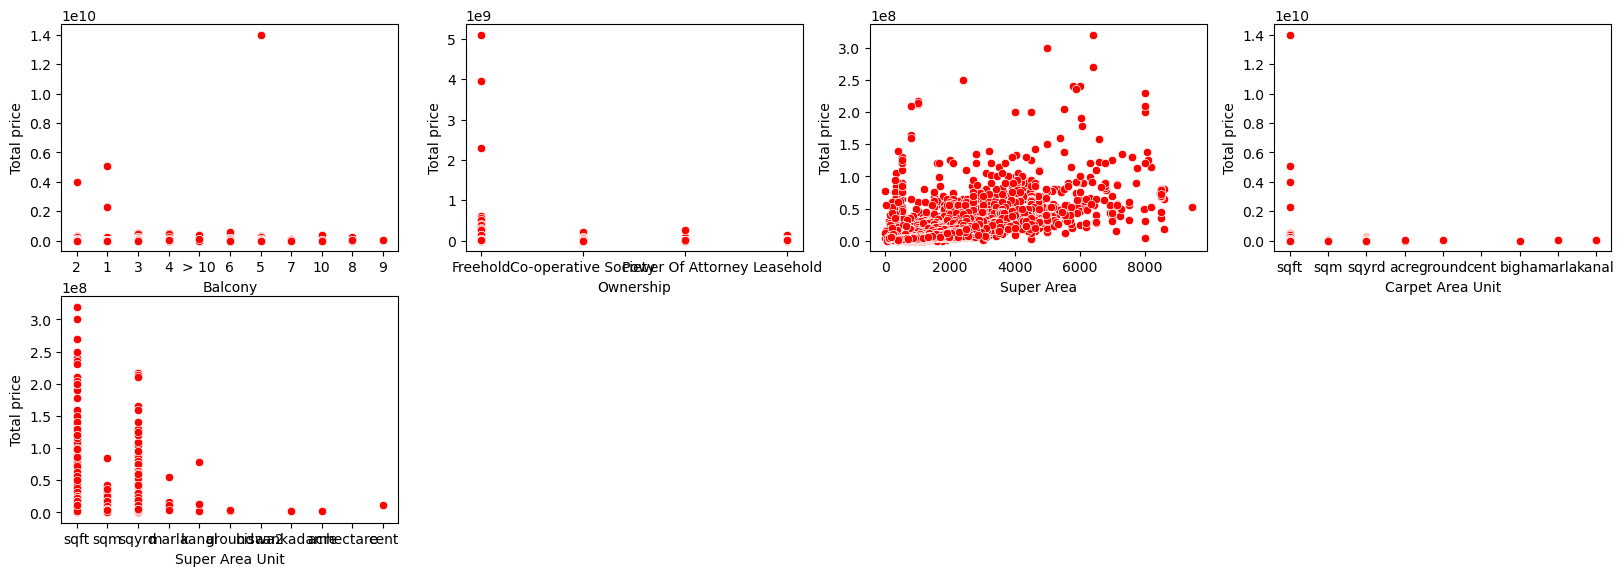

In [19]:
plt.figure(figsize=(20,10))
n=1
for i in df.iloc[:,7:-1]:
    if n<=12:
        plt.subplot(3,4,n)
        sns.scatterplot(x=df[i],y="Total price",data=df,palette=["red","blue","green"],color="red")
        plt.xlabel(i)
    n+=1

In [20]:
c=df.corr(numeric_only=True)
c

,Price (in rupees),Carpet Area,Super Area,Total price
Price (in rupees),1.000000,0.009542,0.037071,0.762790
Carpet Area,0.009542,1.000000,NaN,0.047554
Super Area,0.037071,NaN,1.000000,0.573735
Total price,0.762790,0.047554,0.573735,1.000000


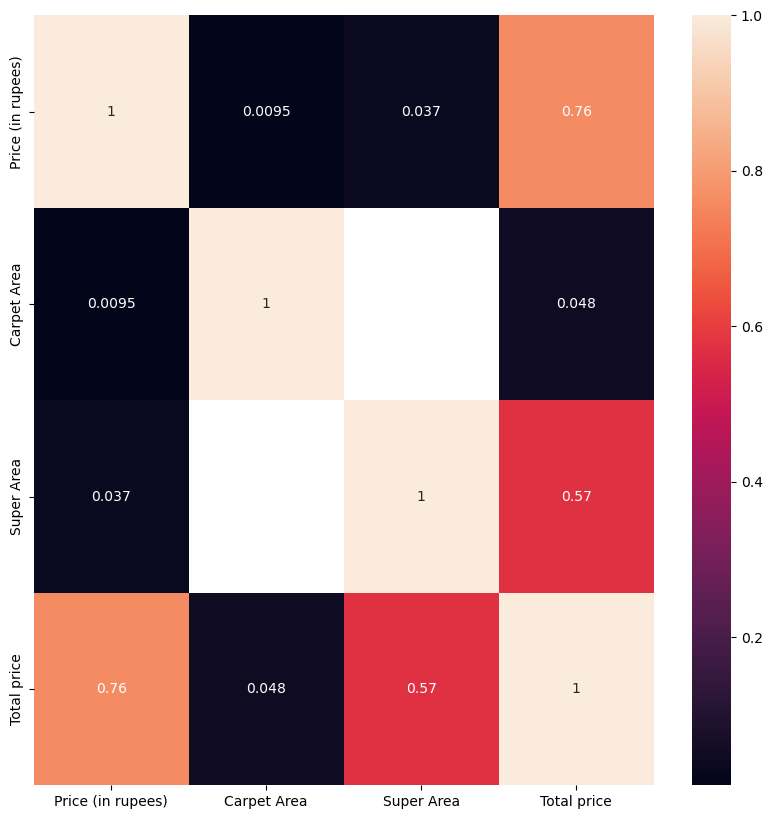

In [21]:
plt.figure(figsize=(10,10))
sns.heatmap(data=c,annot=True)
plt.show()

In [22]:
df.describe() # find the statistical analysis in given data.

,Price (in rupees),Carpet Area,Super Area,Total price
count,1.698660e+05,106858.000000,79792.000000,1.778470e+05
mean,7.583772e+03,1199.795186,1307.762157,1.198134e+07
std,2.724171e+04,3046.197568,686.619108,3.943827e+07
min,0.000000e+00,1.000000,1.000000,1.000000e+05
25%,4.297000e+03,745.000000,925.000000,4.840000e+06
50%,6.034000e+03,1000.000000,1250.000000,7.800000e+06
75%,9.450000e+03,1500.000000,1650.000000,1.450000e+07
max,6.700000e+06,709222.000000,9450.000000,1.400300e+10


## sweetviz using to analyze the data..

In [25]:
#!pip install sweetviz

In [26]:
import sweetviz as sv
report = sv.analyze(df)
report.show_html('report.html')

                                             |                                             | [  0%]   00:00 ->…

                                             |                                             | [  0%]   00:00 ->…

Report report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.
Report report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


## Data preprocessing

In [23]:
df.isna().sum()

Price (in rupees)     17665
location                  0
Carpet Area           80673
Transaction              83
Furnishing             2897
facing                70233
Bathroom                828
Balcony               48935
Ownership             65517
Super Area           107739
Carpet Area Unit      80673
Super Area Unit      107739
Total price            9684
dtype: int64

In [24]:
df["Transaction"].fillna(value=df["Transaction"].mode()[0],inplace=True)
df["Furnishing"].fillna(value=df["Furnishing"].mode()[0],inplace=True)
df["facing"].fillna(value=df["facing"].mode()[0],inplace=True)
df["Ownership"].fillna(value=df["Ownership"].mode()[0],inplace=True)

In [25]:
df["Bathroom"].unique()

array(['1', '2', '3', '4', '6', nan, '5', '10', '9', '8', '> 10', '7'],
      dtype=object)

In [26]:
df["Bathroom"] = df["Bathroom"].replace('> 10', '10')

In [27]:
df["Bathroom"] = df["Bathroom"].fillna(value=df["Bathroom"].mode()[0]).astype(float)

In [28]:
df["Balcony"].unique()
df["Balcony"] = df["Balcony"].replace('> 10', '10')
df["Balcony"] = df["Balcony"].fillna(value=df["Bathroom"].mode()[0]).astype(float)

In [29]:
df.dtypes

Price (in rupees)    float64
location              object
Carpet Area          float64
Transaction           object
Furnishing            object
facing                object
Bathroom             float64
Balcony              float64
Ownership             object
Super Area           float64
Carpet Area Unit      object
Super Area Unit       object
Total price          float64
dtype: object

In [30]:
df.isna().sum()

Price (in rupees)     17665
location                  0
Carpet Area           80673
Transaction               0
Furnishing                0
facing                    0
Bathroom                  0
Balcony                   0
Ownership                 0
Super Area           107739
Carpet Area Unit      80673
Super Area Unit      107739
Total price            9684
dtype: int64

In [31]:
df["Carpet Area"].fillna(value=0, inplace=True)
df["Super Area"].fillna(value=0, inplace=True)
df["Total price"].fillna(value=df["Total price"].median(), inplace=True)
df["Price (in rupees)"].fillna(value=df["Price (in rupees)"].median(), inplace=True)
df["Carpet Area Unit"].fillna(value=df["Carpet Area Unit"].mode()[0], inplace=True)
df["Super Area Unit"].fillna(value=df["Super Area Unit"].mode()[0], inplace=True)

In [32]:
data = df.select_dtypes(include=["int", "float"])
q1 = data.quantile(0.25, interpolation="midpoint")
q2 = data.quantile(0.5, interpolation="midpoint")
q3 = data.quantile(0.75, interpolation="midpoint")
iqr = q3 - q1
upper = q3 + (1.5 * iqr)
lower = q1 - (1.5 * iqr)
outlier = ((data > upper) | (data < lower)).sum()
outlier_percentage = (outlier / len(data)) * 100
print('\nPercentage of outliers for each column:\n', outlier_percentage)



Percentage of outliers for each column:
 Price (in rupees)    5.569746
Carpet Area          1.657326
Bathroom             1.952211
Balcony              5.576145
Super Area           1.052093
Total price          8.002410
dtype: float64


## OUTLIER HANDELD

In [33]:
numeric_columns = df.select_dtypes(include=['int','float']).columns
for column in numeric_columns:
    # Example: Handling outliers by replacing with median
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    median_value = df[column][((df[column] >= lower_bound) & (df[column] <= upper_bound))].median()
    df[column] = np.where((df[column] < lower_bound) | (df[column] > upper_bound), median_value, df[column])


In [34]:
data = df.select_dtypes(include=["int", "float"])
q1 = data.quantile(0.25, interpolation="midpoint")
q2 = data.quantile(0.5, interpolation="midpoint")
q3 = data.quantile(0.75, interpolation="midpoint")
iqr = q3 - q1
upper = q3 + (1.5 * iqr)
lower = q1 - (1.5 * iqr)
outlier = ((data > upper) | (data < lower)).sum()
outlier_percentage = (outlier / len(data)) * 100
print('\nPercentage of outliers for each column:\n', outlier_percentage)


Percentage of outliers for each column:
 Price (in rupees)    5.590009
Carpet Area          0.238894
Bathroom             0.000000
Balcony              0.000000
Super Area           0.058124
Total price          8.153852
dtype: float64


In [35]:
df.duplicated().sum()

122004

In [36]:
df.drop_duplicates(inplace=True)

In [37]:
df.duplicated().sum()

0

In [38]:
df.shape

(65527, 13)

## feature engineering.

In [39]:
df.dtypes

Price (in rupees)    float64
location              object
Carpet Area          float64
Transaction           object
Furnishing            object
facing                object
Bathroom             float64
Balcony              float64
Ownership             object
Super Area           float64
Carpet Area Unit      object
Super Area Unit       object
Total price          float64
dtype: object

In [40]:
enc=LabelEncoder()
df.loc[:,["Carpet Area Unit","location","Transaction","Furnishing","facing","Ownership","Super Area Unit"]]=\
df.loc[:,["Carpet Area Unit","location","Transaction","Furnishing","facing","Ownership","Super Area Unit"]].apply(enc.fit_transform)

In [41]:
df

,Price (in rupees),location,Carpet Area,Transaction,Furnishing,facing,Bathroom,Balcony,Ownership,Super Area,Carpet Area Unit,Super Area Unit,Total price
0,6000.0,67,500.0,3,2,0,1.0,2.0,1,0.0,6,8,4200000.0
1,13799.0,67,473.0,3,1,0,2.0,2.0,1,0.0,6,8,9800000.0
2,6034.0,67,779.0,3,2,0,2.0,2.0,1,0.0,6,8,14000000.0
3,6034.0,67,530.0,3,2,0,1.0,1.0,1,0.0,6,8,2500000.0
4,6034.0,67,635.0,3,2,7,2.0,2.0,0,0.0,6,8,16000000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
187526,3225.0,80,0.0,0,1,0,3.0,3.0,1,1953.0,6,8,6300000.0
187527,3274.0,80,0.0,3,2,2,3.0,2.0,1,1680.0,6,8,5500000.0
187528,4343.0,80,1250.0,3,0,0,3.0,2.0,1,0.0,6,8,7600000.0
187529,4231.0,80,0.0,3,1,0,2.0,2.0,1,709.0,6,8,3000000.0


In [42]:
x=df.drop(["Total price"],axis=1)
x

,Price (in rupees),location,Carpet Area,Transaction,Furnishing,facing,Bathroom,Balcony,Ownership,Super Area,Carpet Area Unit,Super Area Unit
0,6000.0,67,500.0,3,2,0,1.0,2.0,1,0.0,6,8
1,13799.0,67,473.0,3,1,0,2.0,2.0,1,0.0,6,8
2,6034.0,67,779.0,3,2,0,2.0,2.0,1,0.0,6,8
3,6034.0,67,530.0,3,2,0,1.0,1.0,1,0.0,6,8
4,6034.0,67,635.0,3,2,7,2.0,2.0,0,0.0,6,8
...,...,...,...,...,...,...,...,...,...,...,...,...
187526,3225.0,80,0.0,0,1,0,3.0,3.0,1,1953.0,6,8
187527,3274.0,80,0.0,3,2,2,3.0,2.0,1,1680.0,6,8
187528,4343.0,80,1250.0,3,0,0,3.0,2.0,1,0.0,6,8
187529,4231.0,80,0.0,3,1,0,2.0,2.0,1,709.0,6,8


In [43]:
y=df["Total price"]
y

0          4200000.0
1          9800000.0
2         14000000.0
3          2500000.0
4         16000000.0
             ...    
187526     6300000.0
187527     5500000.0
187528     7600000.0
187529     3000000.0
187530    11800000.0
Name: Total price, Length: 65527, dtype: float64

In [44]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=4)

In [45]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
def calculate_accuracy_score(x_train,y_train,x_test,y_test,model):    
    pre3=model.predict(x_test)
    train_score=model.score(x_train,y_train)
    test_score=model.score(x_test,y_test)
    MAE=mean_absolute_error(y_test,pre3)
    MSE=mean_squared_error(y_test,pre3)
    RMSE=mean_squared_error(y_test,pre3,squared=False)
    return train_score,test_score,MAE,MSE,RMSE

In [46]:
#print(jkejwkllk3kl)

## LinearRegression

In [47]:
model=LinearRegression()
model.fit(x_train,y_train)
train_score,test_score,MAE,MSE,RMSE = calculate_accuracy_score(x_train,y_train,x_test,y_test,model)
print("test accuracy :",test_score)
print("train accuracy :",train_score)
print("MAE :",MAE)
print("MSE :",MSE)
print("RMSE :",RMSE)

test accuracy : 0.5810744857084126
train accuracy : 0.5689267201493604
MAE : 1844386.130461444
MSE : 9932436148027.385
RMSE : 3151576.7717171963


## DecisionTreeRegressor

In [48]:
dt=DecisionTreeRegressor(max_depth=100,min_samples_split=15,min_samples_leaf=50,ccp_alpha=0.001)
dt.fit(x_train,y_train)
train_score,test_score,MAE,MSE,RMSE = calculate_accuracy_score(x_train,y_train,x_test,y_test,dt)
print("test accuracy :",test_score)
print("train accuracy :",train_score)
print("MAE :",MAE)
print("MSE :",MSE)
print("RMSE :",RMSE)

test accuracy : 0.7664562569534257
train accuracy : 0.7721362314037973
MAE : 1196660.2809095592
MSE : 5537161706428.909
RMSE : 2353117.4442489925


## GradientBoostingRegressor

In [49]:
gd=GradientBoostingRegressor(subsample=0.4,max_depth=10, min_samples_split=0.1,n_estimators=300)
gd=gd.fit(x_train,y_train)
train_score,test_score,MAE,MSE,RMSE = calculate_accuracy_score(x_train,y_train,x_test,y_test,gd)
print("test accuracy :",test_score)
print("train accuracy :",train_score)
print("MAE :",MAE)
print("MSE :",MSE)
print("RMSE :",RMSE)

test accuracy : 0.7527124271185767
train accuracy : 0.7585098390996304
MAE : 1280084.9400579622
MSE : 5863018469998.996
RMSE : 2421367.066348883


## RandomForestRegressor

In [50]:
rf=RandomForestRegressor(n_estimators=200,max_depth=100,min_samples_leaf=40,max_features=16,min_samples_split=40)
rf.fit(x_train,y_train)
train_score,test_score,MAE,MSE,RMSE = calculate_accuracy_score(x_train,y_train,x_test,y_test,rf)
print("test accuracy :",test_score)
print("train accuracy :",train_score)
print("MAE :",MAE)
print("MSE :",MSE)
print("RMSE :",RMSE)

test accuracy : 0.7772092070860269
train accuracy : 0.7784494559729508
MAE : 1139817.547073308
MSE : 5282216645907.611
RMSE : 2298307.343656982


## AdaBoostRegressor

In [51]:
ad = AdaBoostRegressor(estimator=dt,random_state=4,n_estimators=50,learning_rate=0.1)
ad.fit(x_train,y_train)
train_score,test_score,MAE,MSE,RMSE = calculate_accuracy_score(x_train,y_train,x_test,y_test,ad)
print("test accuracy :",test_score)
print("train accuracy :",train_score)
print("MAE :",MAE)
print("MSE :",MSE)
print("RMSE :",RMSE)

test accuracy : 0.799275740215155
train accuracy : 0.8461240221616562
MAE : 1128696.05344245
MSE : 4759034304808.084
RMSE : 2181521.0988684213


## KNN

In [52]:
from sklearn.neighbors import KNeighborsRegressor
error_rate=[]
for i in range(1,20):
    knn=KNeighborsRegressor(n_neighbors=i)
    knn.fit(x_train,y_train)
    y_pred=knn.predict(x_test)
    error_rate.append(np.mean(y_pred!=y_test))

Minimum error:- 0.6728216084236228 at K = 1


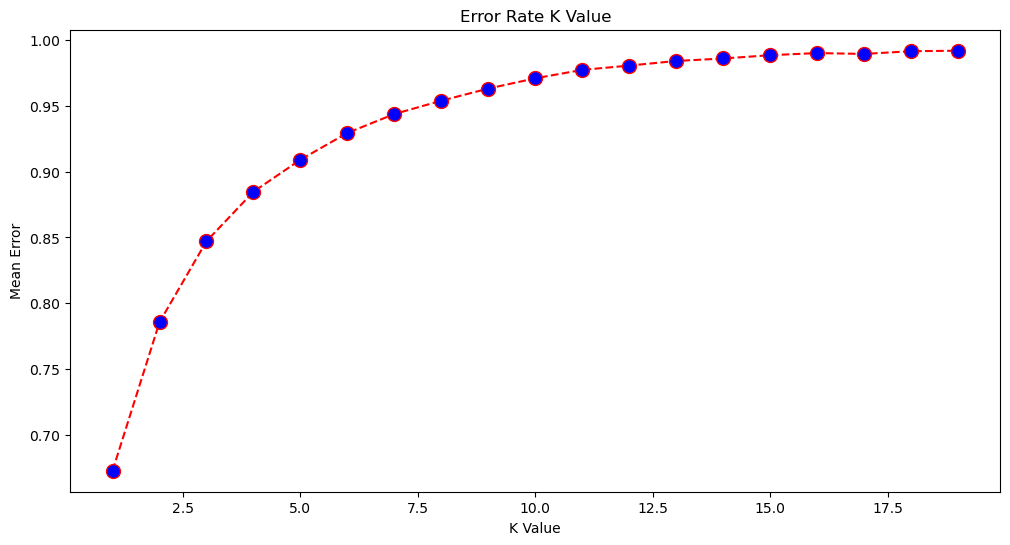

In [53]:
plt.figure(figsize=(12, 6))
plt.plot(range(1,20), error_rate, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')
print("Minimum error:-",min(error_rate),"at K =",error_rate.index(min(error_rate))+1)

In [54]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
model1=KNeighborsRegressor(n_neighbors=11,leaf_size=60,p=2)
model1.fit(x_train,y_train)
train_score,test_score,MAE,MSE,RMSE = calculate_accuracy_score(x_train,y_train,x_test,y_test,model1)
print("test accuracy :",test_score)
print("train accuracy :",train_score)
print("MAE :",MAE)
print("MSE :",MSE)
print("RMSE :",RMSE)

test accuracy : 0.7309246839573003
train accuracy : 0.7583216106141903
MAE : 1190631.9104365802
MSE : 6379590892485.473
RMSE : 2525785.203156728


## Select best test accuracy

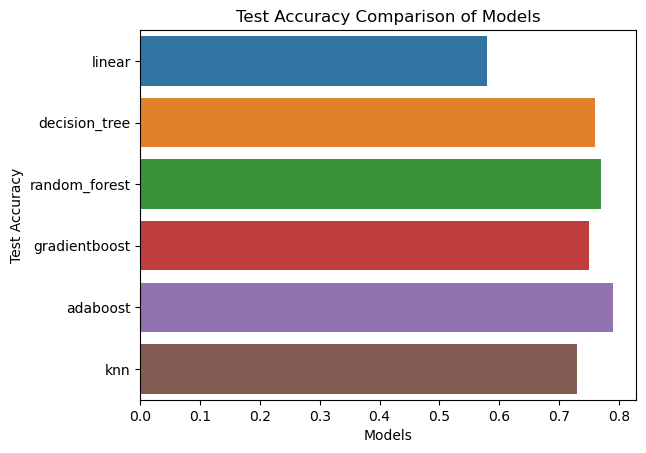

In [55]:
a=["linear","decision_tree","random_forest","gradientboost","adaboost","knn"]
b=[0.58,0.76,0.77,0.75,0.79,0.73]
sns.barplot(x=b,y=a)
plt.xlabel('Models')
plt.ylabel('Test Accuracy')
plt.title('Test Accuracy Comparison of Models')
plt.show()

## Deployment.

In [56]:
import pickle as pkl
pkl.dump(rf,open("mobile.pkl","wb"))
read=pkl.load(open("mobile.pkl","rb"))

In [57]:
x.head(1)

,Price (in rupees),location,Carpet Area,Transaction,Furnishing,facing,Bathroom,Balcony,Ownership,Super Area,Carpet Area Unit,Super Area Unit
0,6000.0,67,500.0,3,2,0,1.0,2.0,1,0.0,6,8


In [58]:
y.head(1)

0    4200000.0
Name: Total price, dtype: float64

In [59]:
# predict the value
independent_input_data=[6000.0,67,500.0,3,2,0,1.0,2.0,1,0.0,6,8]
e=read.predict([independent_input_data])[0]
print(e)

3744002.564171864
